### Project Title : To predict heart strokes using classification ML models

In [236]:
# Importing the necessary libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [238]:
#Load the dataset into a dataframe 

In [239]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [240]:
# Read first five rows of the dataset 

In [241]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [242]:
# Read bottom five rows of the dataset 

In [243]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [244]:
# Check the dimensions of the dataset

In [245]:
df.shape

(5110, 12)

In [246]:
# Check the non-null count and datatype information of the dataset

In [247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [248]:
# There are two columns which looks like category columns but currently appearing as numeric
# Columns:'hypertension' and 'heart_disease'
# Even though we will encode them as numbers, we should separate them so they do not get rescaled along with other numeric columns.

In [249]:
df['hypertension'] = df['hypertension'].astype('object')
df['heart_disease'] = df['heart_disease'].astype('object')
df['stroke'] = df['stroke'].astype('object')

In [250]:
# Check the data types again to see the update

In [251]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension          object
heart_disease         object
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                object
dtype: object

In [252]:
# Check the missing values in the data

In [253]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [254]:
# We got 201 missing values in 'bmi' column and all other columns do not have missing values.

In [255]:
# So, here we can fill the missing or null values by mean or median.
# Here, we will fill the null values by median for the column 'bmi'

In [256]:
# First calculate the median of column 'bmi'

In [257]:
df['bmi'].median()

28.1

In [258]:
# Fill the missing values with median

In [259]:
df['bmi']=df['bmi'].fillna(df['bmi'].median())

In [260]:
# Now, Check the missing values in data again 

In [261]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [262]:
# We can observe that, missing values in 'bmi' are replaced and it is showing no missing values anymore

In [263]:
# Now, Get the summary of numeric variables

In [264]:
df.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,106.147677,28.862035
std,21161.721625,22.612647,45.283560,7.699562
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.800000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,32.800000
max,72940.000000,82.000000,271.740000,97.600000


In [265]:
# Now, Get the summary of categorical variables

In [266]:
df.select_dtypes(include = object).describe()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
count,5110,5110,5110,5110,5110,5110,5110,5110
unique,3,2,2,2,5,2,4,2
top,Female,0,0,Yes,Private,Urban,never smoked,0
freq,2994,4612,4834,3353,2925,2596,1892,4861


In [267]:
# It is possible to know the number of times a category appears in the categorical column by using value_counts()

In [268]:
# We use value_counts() to get frequencies of each category
# Here, we are considering categorical column "gender" to understand frequencies of each category in that column

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

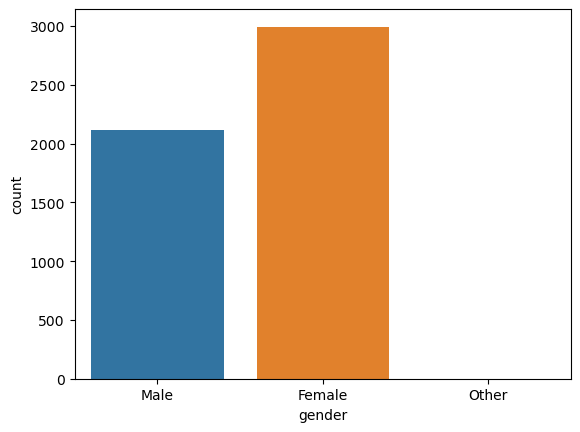

In [269]:
sns.countplot(df['gender'])
df['gender'].value_counts()

In [270]:
# Here, we are considering categorical column "hypertension" to understand frequencies of each category in that column
# Here, 0 represents a person is not suffering from hypertension
# And, 1 represents a person is suffering from hypertension

0    4612
1     498
Name: hypertension, dtype: int64

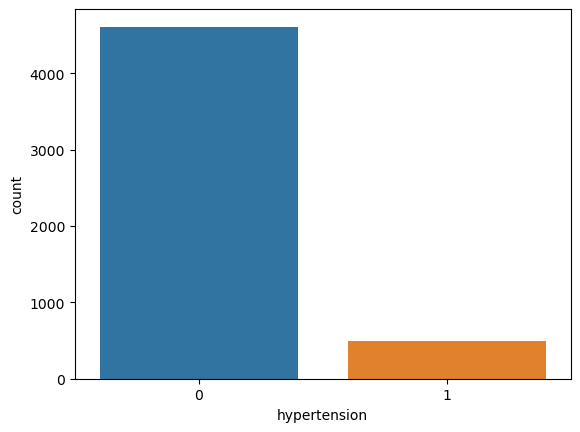

In [271]:
sns.countplot(df['hypertension'])
df['hypertension'].value_counts()

In [272]:
# Here, we are considering categorical column "heart_disease" to understand frequencies of each category in that column
# Here, 0 represents that the person does not have any heart disease
# And, 1 represents that the person has heart disease

0    4834
1     276
Name: heart_disease, dtype: int64

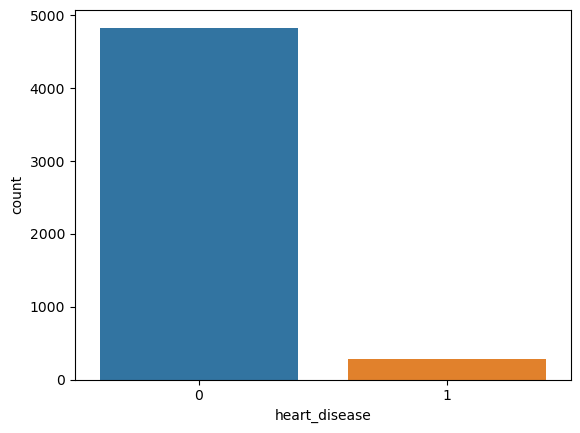

In [273]:
sns.countplot(df['heart_disease'])
df['heart_disease'].value_counts()

In [274]:
# Here, we are considering categorical column "ever_married" to understand frequencies of each category in that column

Yes    3353
No     1757
Name: ever_married, dtype: int64

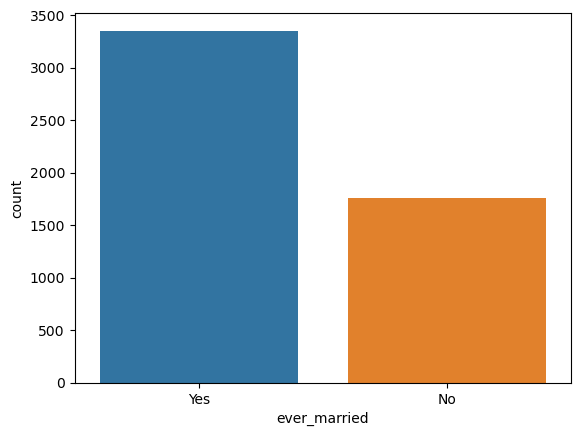

In [275]:
sns.countplot(df['ever_married'])
df['ever_married'].value_counts()

In [276]:
# Here, we are considering categorical column "work_type" to understand frequencies of each category in that column

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

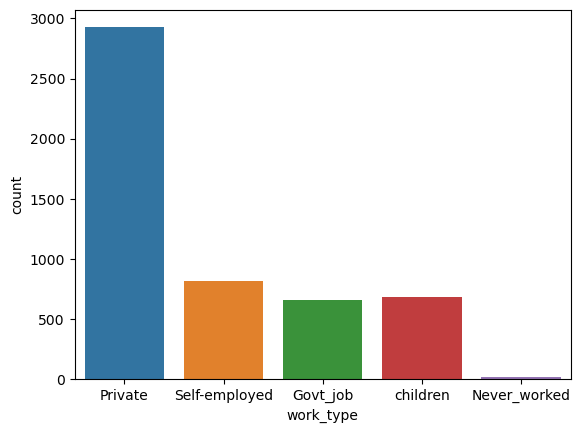

In [277]:
sns.countplot(df['work_type'])
df['work_type'].value_counts()

In [278]:
# Here, we are considering categorical column "Residence_type" to understand frequencies of each category in that column

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

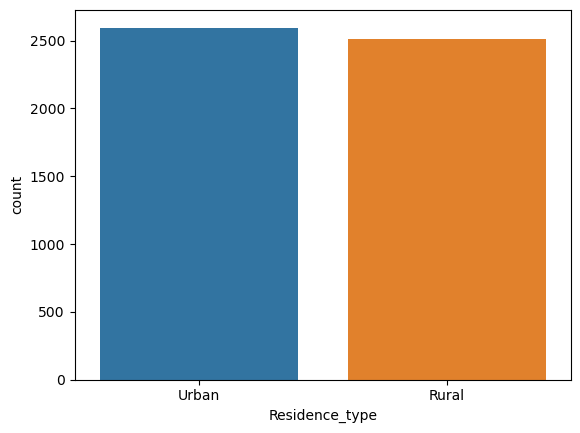

In [279]:
sns.countplot(df['Residence_type'])
df['Residence_type'].value_counts()

In [280]:
# Here, we are considering categorical column "smoking_status" to understand frequencies of each category in that column

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

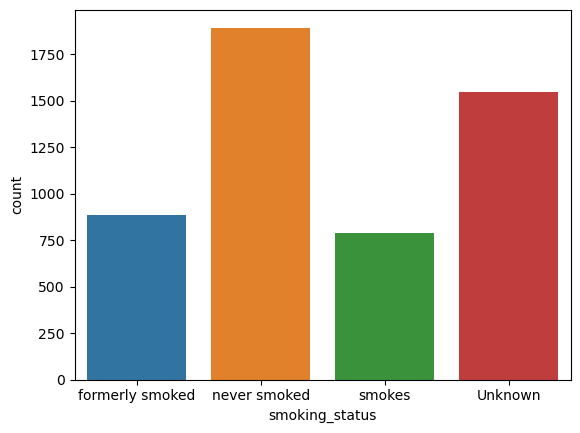

In [281]:
sns.countplot(df['smoking_status'])
df['smoking_status'].value_counts()

In [282]:
# Here, we are considering categorical label column "stroke" to understand frequencies of each category in that column
# Here, 0 represents that the person will not get heart stroke
# And, 1 represents that the person will get heart stroke

0    4861
1     249
Name: stroke, dtype: int64

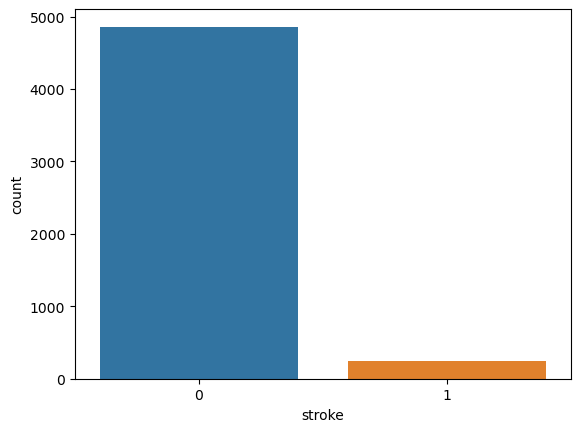

In [283]:
sns.countplot(df['stroke'])
df['stroke'].value_counts()

In [284]:
# Now, we need to perform encoding to convert the categorical variable into numeric variable.
# We are doing this to have a better feature for our predictive models.
# Here, we will use One Hot Encoding for conversion of categorical variables

In [285]:
#One Hot Encoding (OHE)

In [286]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

In [287]:
# transform numeric columns using minmax
# onehot encode category columns
# drop original columns which are now transformed

In [288]:
dfd = df

In [289]:
dfd_num = dfd.select_dtypes(include='number')
dfd_cat = dfd.select_dtypes(include='object')

In [290]:
mmscaler = MinMaxScaler()
mmscaler.fit_transform(dfd_num)

array([[0.12321436, 0.81689453, 0.80126489, 0.30126002],
       [0.70820468, 0.74365234, 0.67902317, 0.20389462],
       [0.42601512, 0.97558594, 0.23451205, 0.25429553],
       ...,
       [0.26972953, 0.42626953, 0.12865848, 0.2325315 ],
       [0.51427826, 0.62158203, 0.51320284, 0.17525773],
       [0.61218833, 0.53613281, 0.13922999, 0.18213058]])

In [291]:
dfd_num_rescaled = pd.DataFrame(mmscaler.fit_transform(dfd_num), columns=dfd_num.columns)

In [292]:
ohe = OneHotEncoder(drop='first')
ohe.fit_transform(dfd_cat).toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [293]:
pd.DataFrame(ohe.fit_transform(dfd_cat).toarray(), columns=ohe.get_feature_names_out())

,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5106,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5107,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
5108,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [294]:
dfd_cat_ohe = pd.DataFrame(ohe.fit_transform(dfd_cat).toarray(), columns=ohe.get_feature_names_out())

In [295]:
# check shape of the two dataframes
dfd_num_rescaled.shape, dfd_cat_ohe.shape

((5110, 4), (5110, 14))

In [296]:
X = pd.concat([dfd_num_rescaled, dfd_cat_ohe], axis = 1)

In [297]:
# this has all the feature columns
X.head()

,id,age,avg_glucose_level,bmi,gender_Male,gender_Other,hypertension_1,heart_disease_1,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke_1
0,0.123214,0.816895,0.801265,0.301260,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,0.708205,0.743652,0.679023,0.203895,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.426015,0.975586,0.234512,0.254296,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.824928,0.597168,0.536008,0.276060,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
4,0.021929,0.963379,0.549349,0.156930,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [298]:
# this has the label column, drop from features dataaset
y = X.stroke_1
X.drop('stroke_1',axis=1,inplace=True)

In [299]:
# separate dataset into features and label
# split into train and test

In [300]:
from sklearn.model_selection import train_test_split

In [301]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the testing set
X_train, X_test, y_train, y_test = train_test_split(dfd_xformd, labl, random_state = 1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

# print dimension of test set
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3577, 17)
y_train (3577,)
X_test (1533, 17)
y_test (1533,)


### KNN Classification Model

In [302]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

In [303]:
knn_clf = KNeighborsClassifier(n_neighbors= 5)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [304]:
# Calculate the accuracy score on train data
train_preds = knn_clf.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 1.])

In [305]:
cm_train = confusion_matrix(y_train, train_preds)
ac_train = accuracy_score(y_train,train_preds)
print('confusion matrix:\n',cm_train)
print('accuracy:\n',ac_train)

confusion matrix:
 [[3404    7]
 [ 148   18]]
accuracy:
 0.9566675985462678


In [306]:
(3411+3)/(3411+3+0+163)

0.9544310875034946

In [307]:
print('Accuracy score on train data: ', ac_train)

Accuracy score on train data:  0.9566675985462678


In [308]:
# Calculate accuracy score on test data

In [309]:
test_preds = knn_clf.predict(X_test)
test_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [310]:
cm_test = confusion_matrix(y_test, test_preds)
ac_test = accuracy_score(y_test,test_preds)
print('confusion matrix:\n',cm_test)
print('accuracy:\n',ac_test)

confusion matrix:
 [[1444    6]
 [  81    2]]
accuracy:
 0.9432485322896281


In [311]:
(1450)/(1450+83)

0.9458577951728636

In [312]:
print('Accuracy score on test data: ', ac_test)

Accuracy score on test data:  0.9432485322896281


In [313]:
# Accuracy performance is consistent between train and test.

### Logistic Regression Model

In [314]:
lr = LogisticRegression()
model = lr.fit(X_train,y_train)

In [315]:
train_preds = lr.predict(X_train)
test_preds=lr.predict(X_test)

In [316]:
cm_train = confusion_matrix(y_train, train_preds)
ac_train = accuracy_score(y_train,train_preds)
print('confusion matrix:\n',cm_train)
print('accuracy:\n',ac_train)

confusion matrix:
 [[3411    0]
 [ 166    0]]
accuracy:
 0.9535923958624546


In [317]:
(3411)/(3411+166)

0.9535923958624546

In [318]:
print('Accuracy score on train data: ', ac_train)

Accuracy score on train data:  0.9535923958624546


In [319]:
cm_test = confusion_matrix(y_test, test_preds)
ac_test = accuracy_score(y_test,test_preds)
print('confusion matrix:\n',cm_test)
print('accuracy:\n',ac_test)

confusion matrix:
 [[1450    0]
 [  83    0]]
accuracy:
 0.9458577951728636


In [320]:
(1450)/(1450+83)

0.9458577951728636

In [321]:
print('Accuracy score on test data: ', ac_test)

Accuracy score on test data:  0.9458577951728636


In [322]:
# Accuracy performance is consistent between train and test.

In [323]:
# So, we got the accuracy of both the models

In [324]:
#1. Accuracy of KNN Classifier model is 0.9432
#2. Accuracy of Logistic Regression model is 0.9458

In [325]:
# We can say that accuracy of both ML classification models is almost same.
# But, accuracy of Logistic 
# Hence, we will select logistic regression model for the prediction of heart strokes. 